# Dataset Preparation

Anggota:
- Ahmad Danindra Nugroho (5025211259)
- Muhammad Ghifari Taqiuddin (5025211063)
- Raihan Farid (5025201141)
- Talitha Hayyinas Sahala (5025211263)

# Preparations

In [ ]:
# Installing dependencies
# Only run once
%pip install gnews nlp-id PySastrawi pillow matplotlib numpy wordcloud pandas

In [5]:
# Import all dependencies
from gnews import GNews
from nlp_id import postag, tokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os
import calendar
import itertools

In [2]:
# Directory for all related files
dataset_dir = 'dataset/'
os.makedirs(dataset_dir, exist_ok=True)

# Preparing Dataset

In [3]:
# Reference: https://colab.research.google.com/drive/1jjQkHysgnHki-GSW2o3NATbX7yoQQCgX?usp=sharing#scrollTo=ntYjU-ifm8bF
def fetch_article_monthly(keyword: str, year: int, month: int):
  last_date_of_month = calendar.monthrange(year, month)[1]
  google_news = GNews(country='Indonesia',
                      language='indonesian',
                      start_date=(year, month, 1),
                      end_date=(year, month, last_date_of_month))
  news = google_news.get_news(keyword)
  return news

def fetch_article_full_year(keyword: str, year: int, article_list: list):
  for month in range(1, 13):
    articles = fetch_article_monthly(keyword, year, month)
    article_list.extend(articles)
    print(f"Fetched {len(articles)} article(s) about '{keyword}' from {calendar.month_name[month]} {year}")

def dump_article_into_csv(keyword: str, year_start: int, year_end: int, output_dir: str):
  article_list = []

  for year in range(year_start, year_end + 1):
    fetch_article_full_year(keyword, year, article_list)

  print(f"Total: {len(article_list)}")

  article_df = pd.DataFrame(article_list)
  article_df['published date'] = pd.to_datetime(article_df['published date'], format='%a, %d %b %Y %H:%M:%S %Z')
  article_df = article_df.sort_values(by='published date')
  article_df.to_csv(os.path.join(output_dir, f'{keyword}-{year_start}-{year_end}.csv'), index=False)

In [9]:
dump_article_into_csv('Bencana Banjir', 2018, 2023, dataset_dir)

Fetched 0 article(s) about 'Bencana Banjir' from January 2018
Fetched 46 article(s) about 'Bencana Banjir' from February 2018
Fetched 46 article(s) about 'Bencana Banjir' from March 2018
Fetched 43 article(s) about 'Bencana Banjir' from April 2018
Fetched 38 article(s) about 'Bencana Banjir' from May 2018
Fetched 35 article(s) about 'Bencana Banjir' from June 2018
Fetched 34 article(s) about 'Bencana Banjir' from July 2018
Fetched 41 article(s) about 'Bencana Banjir' from August 2018
Fetched 37 article(s) about 'Bencana Banjir' from September 2018
Fetched 45 article(s) about 'Bencana Banjir' from October 2018
Fetched 49 article(s) about 'Bencana Banjir' from November 2018
Fetched 49 article(s) about 'Bencana Banjir' from December 2018
Fetched 89 article(s) about 'Bencana Banjir' from January 2019
Fetched 49 article(s) about 'Bencana Banjir' from February 2019
Fetched 100 article(s) about 'Bencana Banjir' from March 2019
Fetched 50 article(s) about 'Bencana Banjir' from April 2019
Fetch

In [9]:
dump_article_into_csv('Banjir', 2018, 2023, dataset_dir)

Fetched 0 article(s) about 'Banjir' from January 2018
Fetched 100 article(s) about 'Banjir' from February 2018
Fetched 100 article(s) about 'Banjir' from March 2018
Fetched 100 article(s) about 'Banjir' from April 2018
Fetched 100 article(s) about 'Banjir' from May 2018
Fetched 100 article(s) about 'Banjir' from June 2018
Fetched 100 article(s) about 'Banjir' from July 2018
Fetched 100 article(s) about 'Banjir' from August 2018
Fetched 100 article(s) about 'Banjir' from September 2018
Fetched 100 article(s) about 'Banjir' from October 2018
Fetched 100 article(s) about 'Banjir' from November 2018
Fetched 100 article(s) about 'Banjir' from December 2018
Fetched 100 article(s) about 'Banjir' from January 2019
Fetched 100 article(s) about 'Banjir' from February 2019
Fetched 100 article(s) about 'Banjir' from March 2019
Fetched 100 article(s) about 'Banjir' from April 2019
Fetched 100 article(s) about 'Banjir' from May 2019
Fetched 100 article(s) about 'Banjir' from June 2019
Fetched 100 ar

03/28/2024 09:17:09 AM - ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


Fetched 0 article(s) about 'Banjir' from February 2022
Fetched 100 article(s) about 'Banjir' from March 2022
Fetched 100 article(s) about 'Banjir' from April 2022
Fetched 100 article(s) about 'Banjir' from May 2022
Fetched 100 article(s) about 'Banjir' from June 2022
Fetched 100 article(s) about 'Banjir' from July 2022
Fetched 100 article(s) about 'Banjir' from August 2022
Fetched 100 article(s) about 'Banjir' from September 2022
Fetched 100 article(s) about 'Banjir' from October 2022
Fetched 100 article(s) about 'Banjir' from November 2022
Fetched 100 article(s) about 'Banjir' from December 2022
Fetched 100 article(s) about 'Banjir' from January 2023
Fetched 100 article(s) about 'Banjir' from February 2023
Fetched 1 article(s) about 'Banjir' from March 2023
Fetched 100 article(s) about 'Banjir' from April 2023
Fetched 100 article(s) about 'Banjir' from May 2023
Fetched 100 article(s) about 'Banjir' from June 2023
Fetched 100 article(s) about 'Banjir' from July 2023
Fetched 100 article

In [5]:
dump_article_into_csv('Gempa Bumi', 2018, 2023, dataset_dir)

Fetched 87 article(s) about 'Gempa Bumi' from January 2018
Fetched 34 article(s) about 'Gempa Bumi' from February 2018
Fetched 28 article(s) about 'Gempa Bumi' from March 2018
Fetched 46 article(s) about 'Gempa Bumi' from April 2018
Fetched 46 article(s) about 'Gempa Bumi' from May 2018
Fetched 40 article(s) about 'Gempa Bumi' from June 2018
Fetched 75 article(s) about 'Gempa Bumi' from July 2018
Fetched 100 article(s) about 'Gempa Bumi' from August 2018
Fetched 100 article(s) about 'Gempa Bumi' from September 2018
Fetched 100 article(s) about 'Gempa Bumi' from October 2018
Fetched 53 article(s) about 'Gempa Bumi' from November 2018
Fetched 100 article(s) about 'Gempa Bumi' from December 2018
Fetched 80 article(s) about 'Gempa Bumi' from January 2019
Fetched 52 article(s) about 'Gempa Bumi' from February 2019
Fetched 51 article(s) about 'Gempa Bumi' from March 2019
Fetched 71 article(s) about 'Gempa Bumi' from April 2019
Fetched 48 article(s) about 'Gempa Bumi' from May 2019
Fetched 62

In [6]:
dump_article_into_csv('Kebakaran', 2018, 2023, dataset_dir)

Fetched 1 article(s) about 'Kebakaran' from January 2018
Fetched 100 article(s) about 'Kebakaran' from February 2018
Fetched 100 article(s) about 'Kebakaran' from March 2018
Fetched 100 article(s) about 'Kebakaran' from April 2018
Fetched 100 article(s) about 'Kebakaran' from May 2018
Fetched 100 article(s) about 'Kebakaran' from June 2018
Fetched 100 article(s) about 'Kebakaran' from July 2018
Fetched 100 article(s) about 'Kebakaran' from August 2018
Fetched 100 article(s) about 'Kebakaran' from September 2018
Fetched 100 article(s) about 'Kebakaran' from October 2018
Fetched 99 article(s) about 'Kebakaran' from November 2018
Fetched 100 article(s) about 'Kebakaran' from December 2018
Fetched 100 article(s) about 'Kebakaran' from January 2019
Fetched 100 article(s) about 'Kebakaran' from February 2019
Fetched 100 article(s) about 'Kebakaran' from March 2019
Fetched 100 article(s) about 'Kebakaran' from April 2019
Fetched 100 article(s) about 'Kebakaran' from May 2019
Fetched 100 artic

In [7]:
dump_article_into_csv('Kecelakaan', 2018, 2023, dataset_dir)

Fetched 100 article(s) about 'Kecelakaan' from January 2018
Fetched 100 article(s) about 'Kecelakaan' from February 2018
Fetched 100 article(s) about 'Kecelakaan' from March 2018
Fetched 100 article(s) about 'Kecelakaan' from April 2018
Fetched 100 article(s) about 'Kecelakaan' from May 2018
Fetched 100 article(s) about 'Kecelakaan' from June 2018
Fetched 100 article(s) about 'Kecelakaan' from July 2018
Fetched 100 article(s) about 'Kecelakaan' from August 2018
Fetched 100 article(s) about 'Kecelakaan' from September 2018
Fetched 100 article(s) about 'Kecelakaan' from October 2018
Fetched 100 article(s) about 'Kecelakaan' from November 2018
Fetched 100 article(s) about 'Kecelakaan' from December 2018
Fetched 100 article(s) about 'Kecelakaan' from January 2019
Fetched 100 article(s) about 'Kecelakaan' from February 2019
Fetched 100 article(s) about 'Kecelakaan' from March 2019
Fetched 100 article(s) about 'Kecelakaan' from April 2019
Fetched 100 article(s) about 'Kecelakaan' from May 20

In [8]:
os.listdir(dataset_dir)

['Gempa Bumi-2018-2023.csv',
 'Kebakaran-2018-2023.csv',
 'Bencana Banjir-2018-2023.csv',
 'Kecelakaan-2018-2023.csv']

# Banjir

## Loading Dataset

In [ ]:
df = pd.read_csv(os.path.join(dataset_dir, 'Gempa bumi-2013-2023.csv'))
df = df.drop(columns=['description' , 'url', 'publisher'])
df['title'] = df['title'].apply(lambda x: x.split(' - ')[0])
df = df[['published date', 'title']]
print(df.shape)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/TextMining/Week02/dataset/Gempa bumi-2018-2023.csv'

## Preprocessing

1. Casefolding: mengubah semua karakter huruf ke huruf kecil
2. Stemming: mengubah suatu kata menjadi bentuk dasarnya (mengatakan -> kata)
3. Tokenization: memecah kalimat menjadi beberapa token
4. Stopwords Removal: memfilter kata yang sering muncul tapi tidak berpengaruh dalam pemrosesan (tergantung umumnya konjungsi, preposisi, pronomina, dsb.)

In [ ]:
# 1. Casefolding
df['title'] = df['title'].str.lower()
df.head()

,published date,title
0,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te..."
1,2018-02-05 08:00:00+00:00,"sungai ciliwung meluap, permukiman kampung mel..."
2,2018-02-05 08:00:00+00:00,banjir landa 6 kelurahan di jakarta timur
3,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir
4,2018-02-05 08:00:00+00:00,tni siapkan posko bantu korban banjir di kampu...


In [ ]:
# 2. Stemming
# Menggunakan stemmer dari library PySastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stem'] = df['title'].apply(stemmer.stem)
df.head()

,published date,title,stem
0,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tangan
1,2018-02-05 08:00:00+00:00,"sungai ciliwung meluap, permukiman kampung mel...",sungai ciliwung luap mukim kampung melayu rend...
2,2018-02-05 08:00:00+00:00,banjir landa 6 kelurahan di jakarta timur,banjir landa 6 lurah di jakarta timur
3,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir
4,2018-02-05 08:00:00+00:00,tni siapkan posko bantu korban banjir di kampu...,tni siap posko bantu korban banjir di kampung ...


In [ ]:
# 3. Tokenization
# Menggunakan tokenizer dari library nlp-id
tok = tokenizer.Tokenizer()

df['tokens'] = df['stem'].apply(tok.tokenize)
df.head()

,published date,title,stem,tokens
0,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tangan,"[ini, 11, titik, banjir, di, denpasar, yang, b..."
1,2018-02-05 08:00:00+00:00,"sungai ciliwung meluap, permukiman kampung mel...",sungai ciliwung luap mukim kampung melayu rend...,"[sungai, ciliwung, luap, mukim, kampung, melay..."
2,2018-02-05 08:00:00+00:00,banjir landa 6 kelurahan di jakarta timur,banjir landa 6 lurah di jakarta timur,"[banjir, landa, 6, lurah, di, jakarta, timur]"
3,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir,"[jalur, pantura, kudus, sendat, akibat, banjir]"
4,2018-02-05 08:00:00+00:00,tni siapkan posko bantu korban banjir di kampu...,tni siap posko bantu korban banjir di kampung ...,"[tni, siap, posko, bantu, korban, banjir, di, ..."


In [ ]:
# 4. Stopwords removal
# Menggunakan list stopwords dari library nltk
list_stopwords = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

df['tokens_clean'] = df['tokens'].apply(remove_stopwords)
df.head()

,published date,title,stem,tokens,tokens_clean
0,2018-02-04 08:00:00+00:00,"ini, 11 titik banjir di denpasar yang belum te...",ini 11 titik banjir di denpasar yang belum tangan,"[ini, 11, titik, banjir, di, denpasar, yang, b...","[11, titik, banjir, denpasar, tangan]"
1,2018-02-05 08:00:00+00:00,"sungai ciliwung meluap, permukiman kampung mel...",sungai ciliwung luap mukim kampung melayu rend...,"[sungai, ciliwung, luap, mukim, kampung, melay...","[sungai, ciliwung, luap, mukim, kampung, melay..."
2,2018-02-05 08:00:00+00:00,banjir landa 6 kelurahan di jakarta timur,banjir landa 6 lurah di jakarta timur,"[banjir, landa, 6, lurah, di, jakarta, timur]","[banjir, landa, 6, lurah, jakarta, timur]"
3,2018-02-05 08:00:00+00:00,jalur pantura kudus tersendat akibat banjir,jalur pantura kudus sendat akibat banjir,"[jalur, pantura, kudus, sendat, akibat, banjir]","[jalur, pantura, kudus, sendat, akibat, banjir]"
4,2018-02-05 08:00:00+00:00,tni siapkan posko bantu korban banjir di kampu...,tni siap posko bantu korban banjir di kampung ...,"[tni, siap, posko, bantu, korban, banjir, di, ...","[tni, posko, bantu, korban, banjir, kampung, m..."


## Visualisasi WordCloud

Pembanding data antara sebelum dan setelah dilakukan pra-pemrosesan

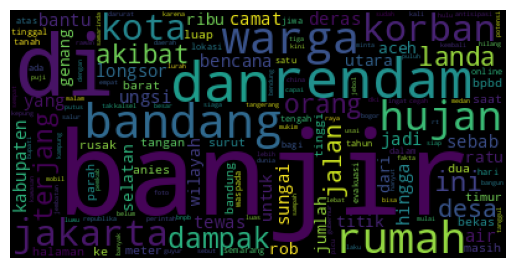

In [ ]:
text_before = ' '.join(df['stem'].tolist())
wordcloud_before = WordCloud(background_color='white', collocations=False).generate(text_before)

plt.imshow(wordcloud_before)
plt.axis("off")
plt.show()

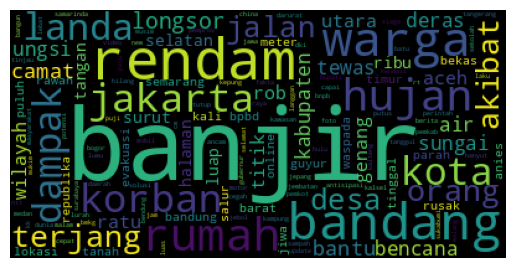

In [ ]:
text_after = ' '.join(df['tokens_clean'].apply(' '.join).to_list())
wordcloud_after = WordCloud(background_color='white', collocations=False).generate(text_after)

plt.imshow(wordcloud_after)
plt.axis("off")
plt.show()

## TF-IDF